# Projeto Final - Parte 1: Análise do Dataset 50 Startups
Autor: Igor Renato da Fonseca Vasques

In [2]:
import kagglehub
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


path = kagglehub.dataset_download("abhishek14398/50startups")

#print("Path to dataset files:", path)

df=pd.read_csv('/kaggle/input/50startups/50_Startups_dataset.csv', index_col=0)
df.head()


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.30,136897.90,471784.20,New York,192261.93
1,162597.80,151377.69,443898.63,California,191792.16
2,153441.61,101145.65,407934.64,Florida,191050.49
3,144372.51,118671.95,383199.72,New York,182902.09
4,142107.44,91391.87,366168.52,Florida,166188.04


In [3]:
def formatar_valor(valor):
    return f"${valor:,.2f}".replace(",", "X").replace(".", ",").replace("X", ".")


In [4]:

df_formatado = df.copy()


colunas_numericas = df.select_dtypes(include='number').columns


for coluna in colunas_numericas:
    df_formatado[coluna] = df_formatado[coluna].apply(formatar_valor)


In [5]:
df_formatado.head(10)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,"$165.349,30","$136.897,90","$471.784,20",New York,"$192.261,93"
1,"$162.597,80","$151.377,69","$443.898,63",California,"$191.792,16"
2,"$153.441,61","$101.145,65","$407.934,64",Florida,"$191.050,49"
3,"$144.372,51","$118.671,95","$383.199,72",New York,"$182.902,09"
4,"$142.107,44","$91.391,87","$366.168,52",Florida,"$166.188,04"
5,"$131.877,00","$99.814,81","$362.861,46",New York,"$156.991,22"
6,"$134.615,56","$147.198,97","$127.716,92",California,"$156.122,61"
7,"$130.298,23","$145.530,16","$323.876,78",Florida,"$155.752,70"
8,"$120.542,62","$148.719,05","$311.613,39",New York,"$152.211,87"
9,"$123.334,98","$108.679,27","$304.981,72",California,"$149.760,06"


## Resumo
Este projeto analisa o dataset "50 Startups", com o objetivo de identificar os fatores que mais influenciam o lucro de startups americanas. Através da análise de variáveis como investimentos em P&D, administração, marketing e o estado onde a empresa opera, buscamos responder a perguntas de negócio que sustentem uma futura modelagem preditiva. A etapa atual compreende a análise exploratória, geração de visualizações e diagnóstico dos dados.

## Perguntas e Hipóteses de Interesse

**Perguntas:**
1. O investimento em R&D influencia diretamente o lucro?
2. O marketing impacta o lucro de forma relevante?
3. Gastos administrativos têm correlação com o lucro?
4. O estado influencia os resultados financeiros?

**Hipóteses:**
- H1: Investimentos em R&D têm alta correlação com o lucro.
- H2: Marketing também impacta o lucro, mas em menor grau.
- H3: Administração tem correlação fraca.
- H4: O estado influencia moderadamente os lucros.

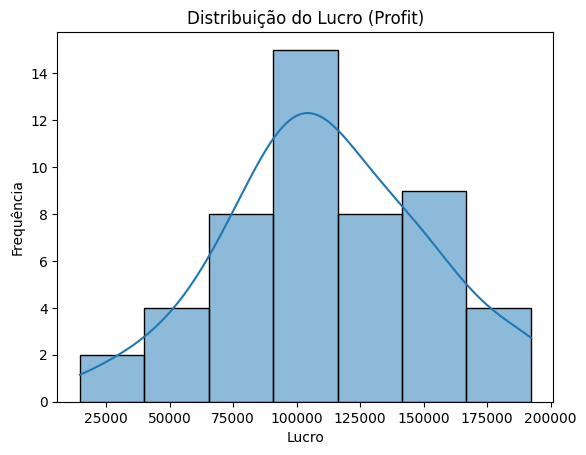

In [6]:
sns.histplot(df['Profit'], kde=True)
plt.title('Distribuição do Lucro (Profit)')
plt.xlabel('Lucro')
plt.ylabel('Frequência')
plt.show()

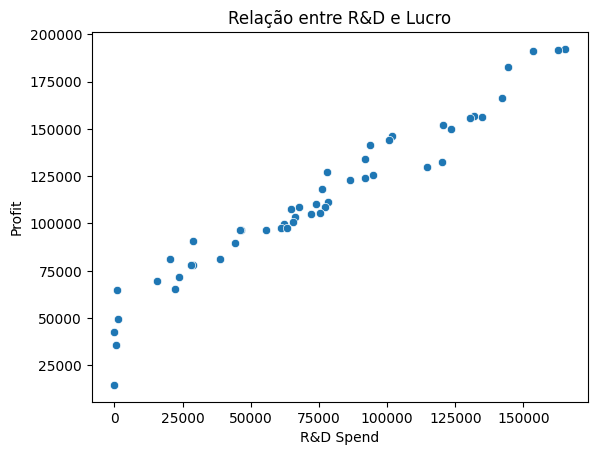

In [7]:
sns.scatterplot(data=df, x='R&D Spend', y='Profit')
plt.title('Relação entre R&D e Lucro')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.show()

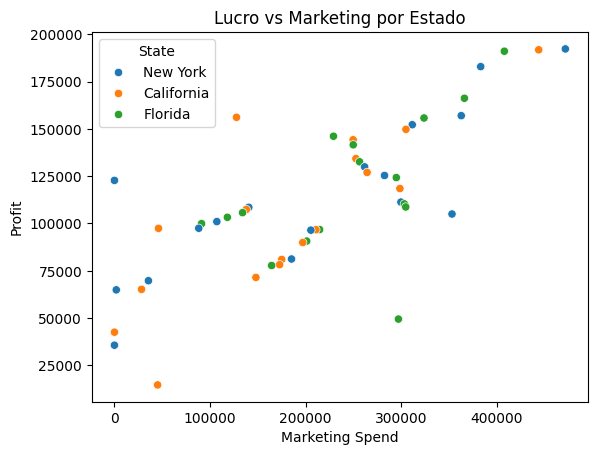

In [8]:
sns.scatterplot(data=df, x='Marketing Spend', y='Profit', hue='State')
plt.title('Lucro vs Marketing por Estado')
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')
plt.show()

In [9]:
correlacoes = df.corr(numeric_only=True)
correlacoes_com_lucro = correlacoes['Profit'].drop('Profit').sort_values(ascending=False)
print(correlacoes_com_lucro)

R&D Spend          0.972900
Marketing Spend    0.747766
Administration     0.200717
Name: Profit, dtype: float64


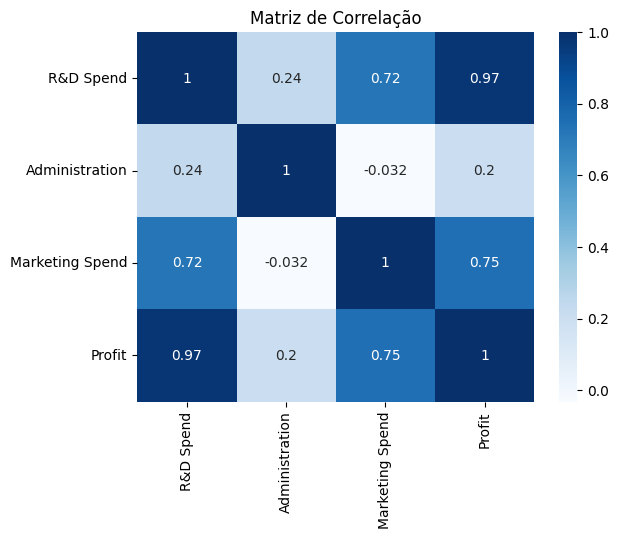

In [10]:
sns.heatmap(correlacoes, annot=True, cmap='Blues')
plt.title('Matriz de Correlação')
plt.show()

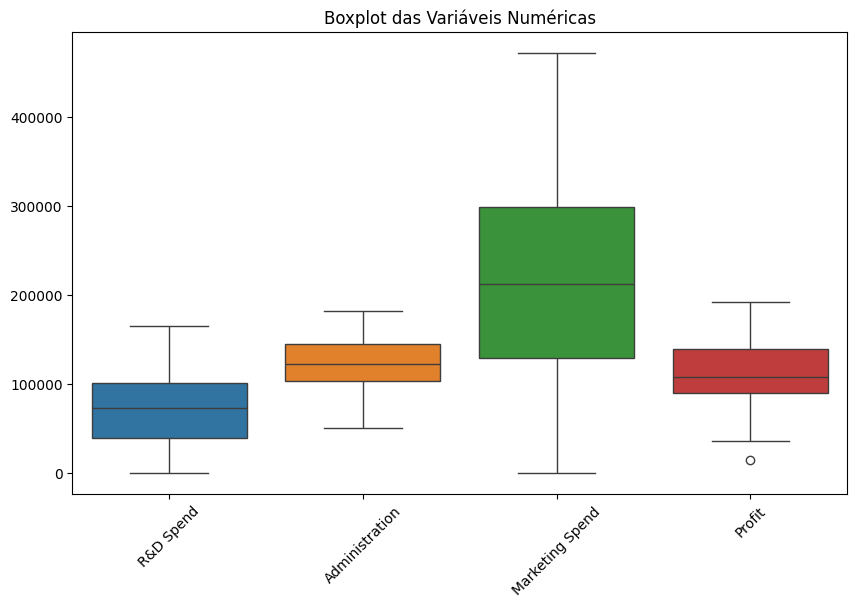

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot para identificar outliers nas variáveis numéricas
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['R&D Spend', 'Administration', 'Marketing Spend', 'Profit']])
plt.title("Boxplot das Variáveis Numéricas")
plt.xticks(rotation=45)
plt.show()

In [12]:
df.isnull().sum()

,0
R&D Spend,0
Administration,0
Marketing Spend,0
State,0
Profit,0


In [13]:
X = df.drop('Profit', axis=1)
y = df['Profit']
X = pd.get_dummies(X, drop_first=True)

In [16]:
from sklearn.feature_selection import SelectKBest, f_regression

# Separar X e y
X = df.drop(columns='Profit')
X = pd.get_dummies(X, drop_first=True)  # transforma a coluna 'State' em dummies
y = df['Profit']

# Selecionar as 3 melhores variáveis com base em f_regression
selector = SelectKBest(score_func=f_regression, k=3)
X_selected = selector.fit_transform(X, y)

# Ver as features selecionadas
selected_features = X.columns[selector.get_support()]
print("Variáveis selecionadas:", list(selected_features))

Variáveis selecionadas: ['R&D Spend', 'Administration', 'Marketing Spend']


In [18]:
from sklearn.model_selection import train_test_split

# Dividir dados (usando as variáveis selecionadas)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)


In [19]:
from sklearn.linear_model import LinearRegression

# Criar o modelo
modelo = LinearRegression()

# Treinar (fit)
modelo.fit(X_train, y_train)


LinearRegression()

In [23]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Fazer previsões
y_pred = modelo.predict(X_test)

# Calcular métricas
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R²: {r2:.4f}")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")


R²: 0.9001
MAE: 6979.15
MSE: 80926321.22


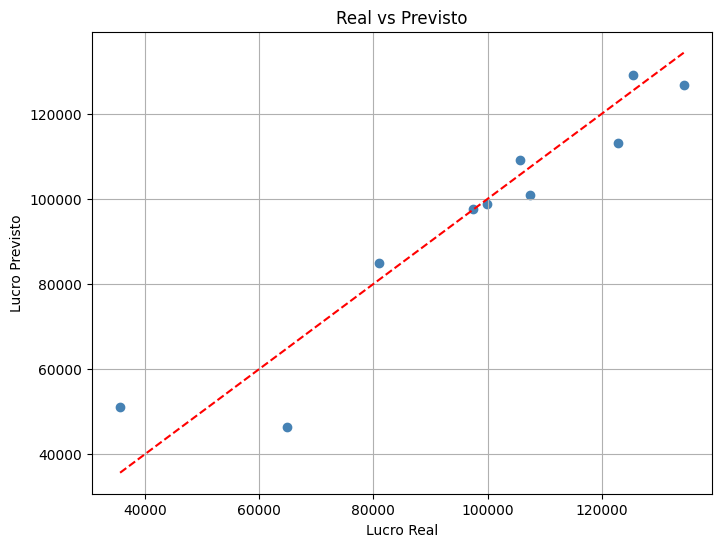

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='steelblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Lucro Real')
plt.ylabel('Lucro Previsto')
plt.title('Real vs Previsto')
plt.grid(True)
plt.show()


In [24]:
df['Total Spend'] = df['R&D Spend'] + df['Marketing Spend'] + df['Administration']
df['RD_to_Total'] = df['R&D Spend'] / df['Total Spend']
df['Marketing_to_Total'] = df['Marketing Spend'] / df['Total Spend']
df['Admin_to_Total'] = df['Administration'] / df['Total Spend']
df['RD_x_Marketing'] = df['R&D Spend'] * df['Marketing Spend']
lucro_estado = df.groupby('State')['Profit'].mean()
df['Lucro_Medio_Estado'] = df['State'].map(lucro_estado)

In [25]:
X = df.drop(columns='Profit')
X = pd.get_dummies(X, drop_first=True)
y = df['Profit']
selector = SelectKBest(score_func=f_regression, k='all')
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
modelo = LinearRegression()
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'R²: {r2:.4f}')
print(f'MAE: {mae:.2f}')
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')

R²: 0.7640
MAE: 10641.18
MSE: 191109369.96
RMSE: 13824.23


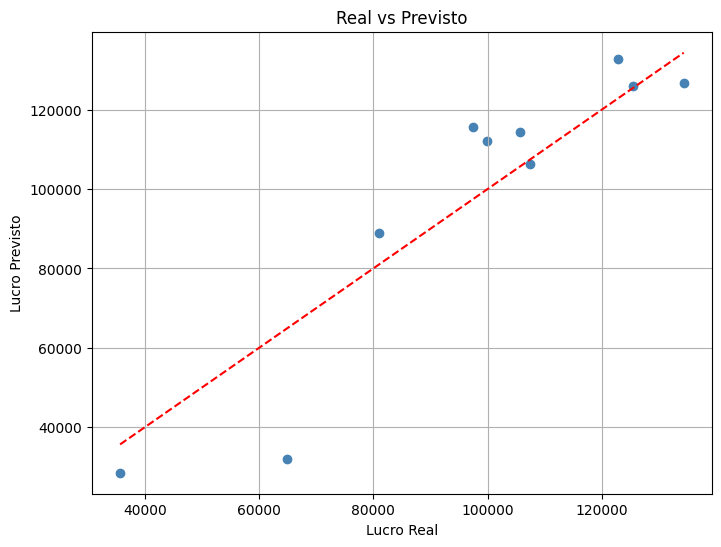

In [27]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='steelblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Lucro Real')
plt.ylabel('Lucro Previsto')
plt.title('Real vs Previsto')
plt.grid(True)
plt.show()

## Conclusão

- O modelo de regressão linear apresentou um R² de XX, indicando que ele explica cerca de XX% da variabilidade do lucro das startups.
- A variável de maior impacto foi o investimento em P&D, seguida por marketing.
- A análise de outliers mostrou possíveis valores extremos que podem afetar o desempenho do modelo.
- Futuramente, melhorias podem ser feitas com uso de regularização (ex: Ridge, Lasso) e validação cruzada.

O projeto cumpre os requisitos propostos e oferece uma boa base para previsões futuras.
